# Data Science Course Week 2 - Data Visualisation

## We will be exploring datasets with Python visualisation libraries

For more information refer to the [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) and the [Plotly Documentation](https://plot.ly/python/offline/)


### 1. Matplotlib
The easiest way to visualise Pandas Dataframes

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [4]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_table('drinks.csv', sep=',')
drinks = pd.read_csv('drinks.csv')              # assumes separator is comma
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


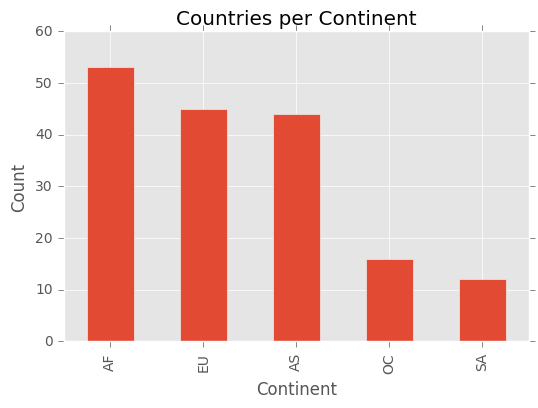

In [5]:
# bar plot of number of countries in each continent
drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
#plt.show()                                  # show plot window (if it doesn't automatically appear)
plt.savefig('countries_per_continent.png')  # save plot to file

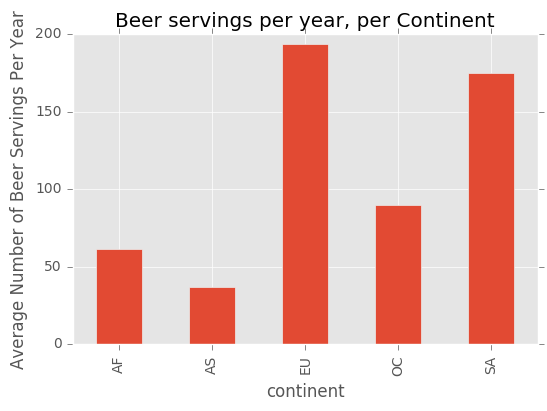

In [6]:
# bar plot of average number of beer servings (per adult per year) by continent
drinks.groupby('continent').beer_servings.mean().plot(kind='bar', title='Beer servings per year, per Continent')
plt.ylabel('Average Number of Beer Servings Per Year')

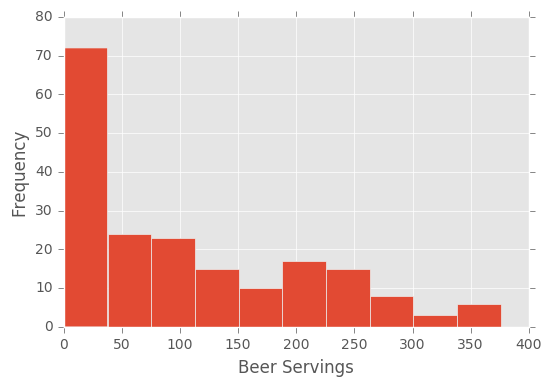

In [7]:
# histogram of beer servings (shows the distribution of a numeric column)
drinks.beer_servings.hist(bins=10)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

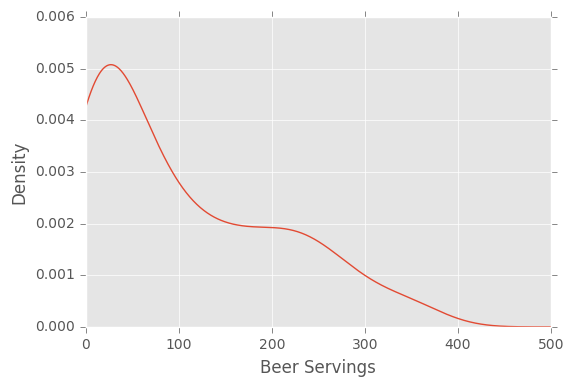

In [8]:
# density plot of beer servings (smooth version of a histogram)
drinks.beer_servings.plot(kind='density', xlim=(0,500))
plt.xlabel('Beer Servings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ef9090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1199c6e10>]], dtype=object)

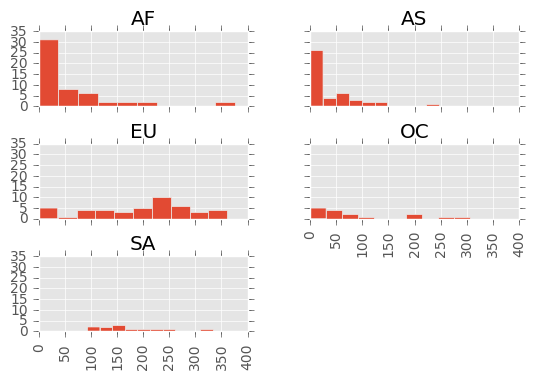

In [9]:
# grouped histogram of beer servings (shows the distribution for each group)
drinks.beer_servings.hist(by=drinks.continent, sharex=True, sharey=True)

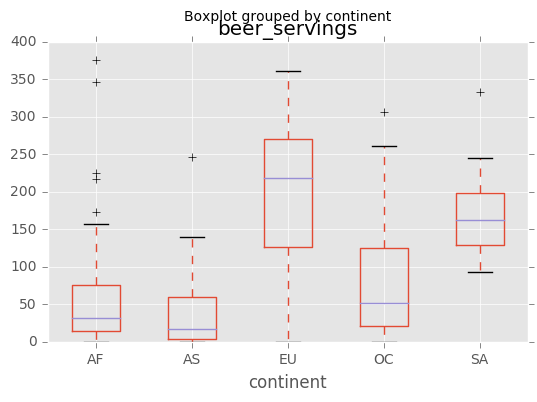

In [10]:
# boxplot of beer servings by continent (shows five-number summary and outliers)
drinks.boxplot(column='beer_servings', by='continent')

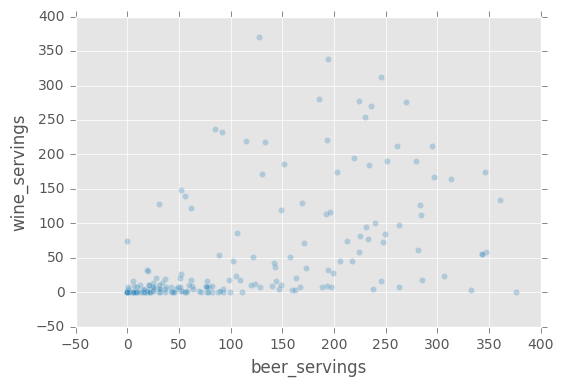

In [11]:
# scatterplot of beer servings versus wine servings
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', alpha=0.3)

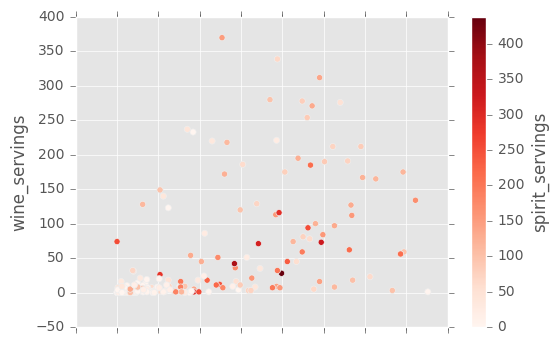

In [12]:
# same scatterplot, except point color varies by 'spirit_servings'
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', c='spirit_servings', colormap='Reds')

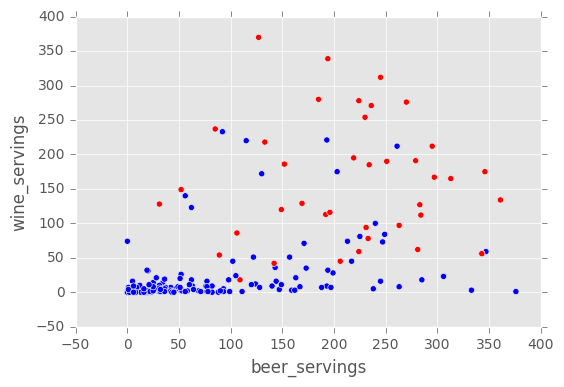

In [13]:
# same scatterplot, except all European countries are colored red
colors = np.where(drinks.continent=='EU', 'r', 'b')
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', c=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a88d810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b388f90>]], dtype=object)

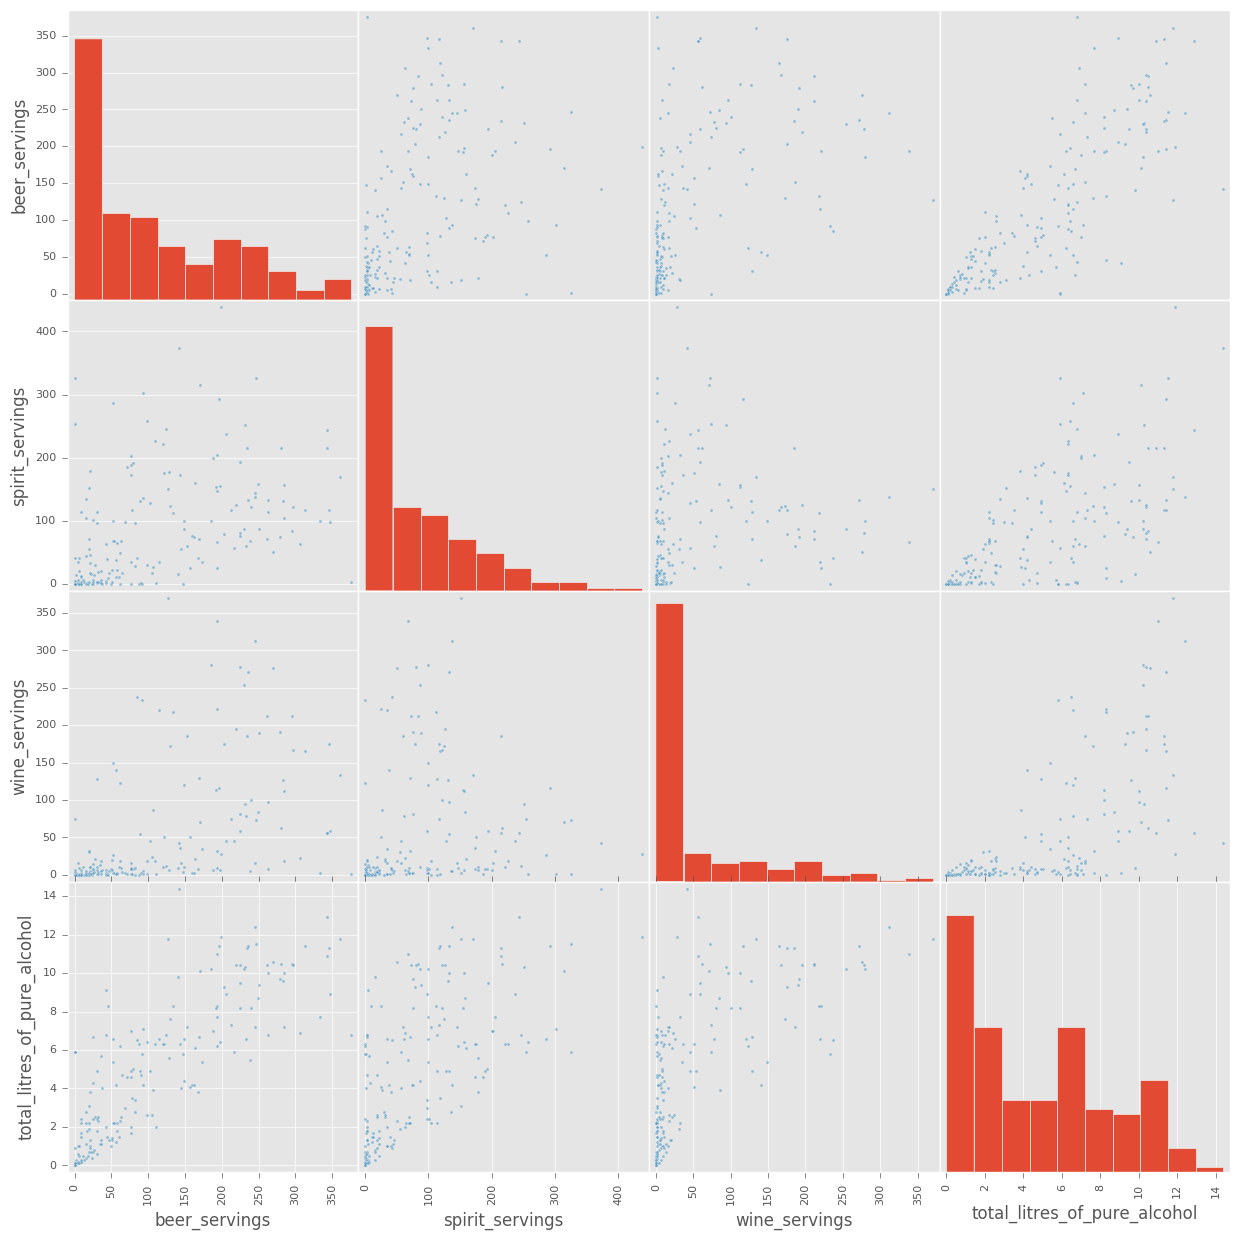

In [14]:
# scatterplot matrix of all numerical columns
pd.scatter_matrix(drinks, figsize=(15,15))

### 2. ggplot
This is a mimic of an R package for plotting that is very popular. The benefit of learning this package is that you will be able to think the same way about plotting in both Python and R.
https://github.com/yhat/ggplot

Rough syntax:

- For common plots, establish the data source and data mapping with ggplot and aes:
    - ggplot(data, aes(x='var', y='var2'))

- Then add geometries (plot objects) that depend on the data mappings:
    - geom_histogram()
    - geom_point()

A good recent post about ploting libraries avaiable in Python and how their syntax differ: https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

The 'R Graphics Cookbook' by Winston Chang is a great book on how to achieve what you want with ggplot()



In [13]:
!pip install -U ggplot
#!conda install -c conda-forge ggplot
#!pip install git+https://github.com/yhat/ggplot.git

    100% |████████████████████████████████| 2.2MB 204kB/s 
Requirement already up-to-date: scipy in /anaconda/lib/python2.7/site-packages (from ggplot)
Requirement already up-to-date: statsmodels in /anaconda/lib/python2.7/site-packages (from ggplot)
Requirement already up-to-date: patsy>=0.4 in /anaconda/lib/python2.7/site-packages (from ggplot)
Requirement already up-to-date: cycler in /anaconda/lib/python2.7/site-packages (from ggplot)
Requirement already up-to-date: six in /anaconda/lib/python2.7/site-packages (from ggplot)
    100% |████████████████████████████████| 3.9MB 119kB/s 
    100% |████████████████████████████████| 11.3MB 52kB/s 
Requirement already up-to-date: matplotlib in /anaconda/lib/python2.7/site-packages (from ggplot)
    100% |████████████████████████████████| 481kB 580kB/s 
Requirement already up-to-date: python-dateutil in /anaconda/lib/python2.7/site-packages (from pandas->ggplot)
    100% |████████████████████████████████| 61kB 3.7MB/s 
  Found existing insta

In [15]:
from ggplot import *

#### A Single Variable: Shape and Distribution

In [16]:
# data set mpg - included in ggplot package - car fuel mileage
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


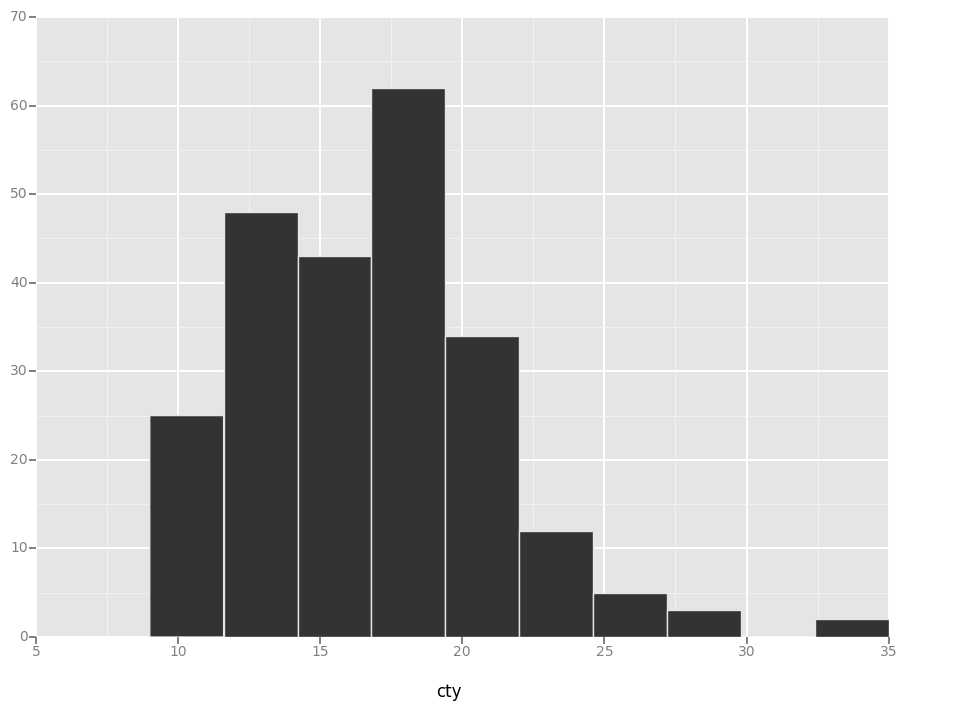

<ggplot: (299176777)>

In [16]:
# Single variable analysis: histogram
ggplot(mpg, aes(x='cty')) + geom_histogram()

##### Kernel Density Estimates
To form a KDE, we place a kernel—that is, a smooth, strongly peaked function—at the position of each data point. We then add up the contributions from all kernels to obtain a smooth curve, which we can evaluate at any point along the x axis.

Example Kernels:
(Gaussian must commonly used)

![KDE](KDE_kernals.png)

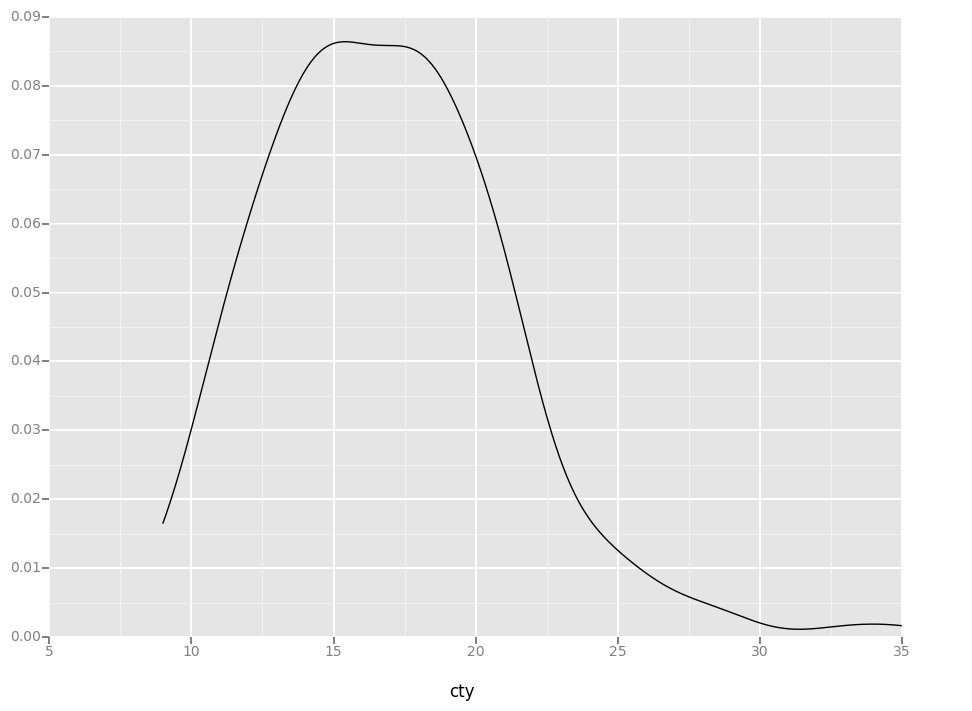

<ggplot: (298508129)>

In [17]:
# Single variable analysis: kernel density estimate
ggplot(mpg, aes(x='cty')) + geom_density()


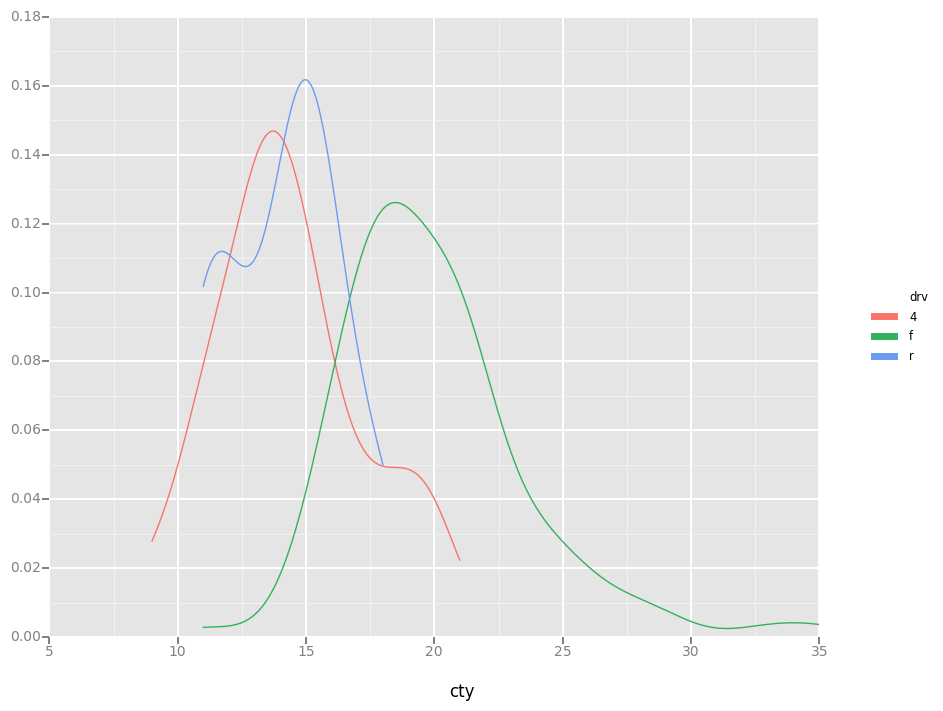

<ggplot: (299734097)>

In [18]:
# Single variable analysis: kernel density estimate with plots split by drivetrain variable
ggplot(mpg, aes(x='cty', colour='drv')) + geom_density()


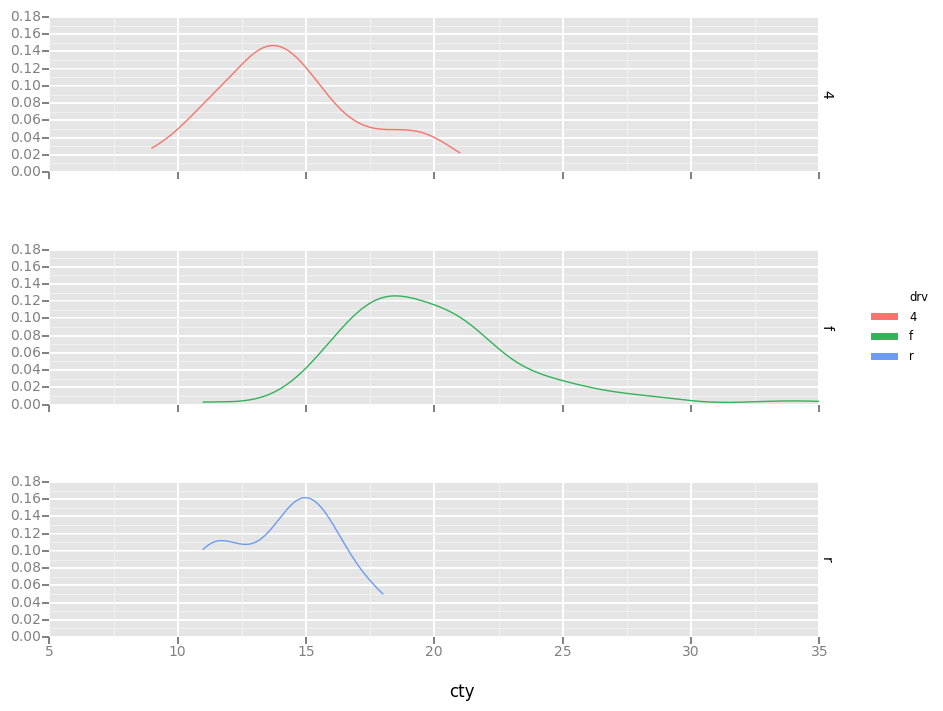

<ggplot: (298477061)>

In [19]:
# Single variable analysis: kernel density estimate with plots split by drivetrain variable, faceted
ggplot(mpg, aes(x='cty', colour='drv')) + geom_density() + facet_grid('drv')

##### Box plot and Violin plot

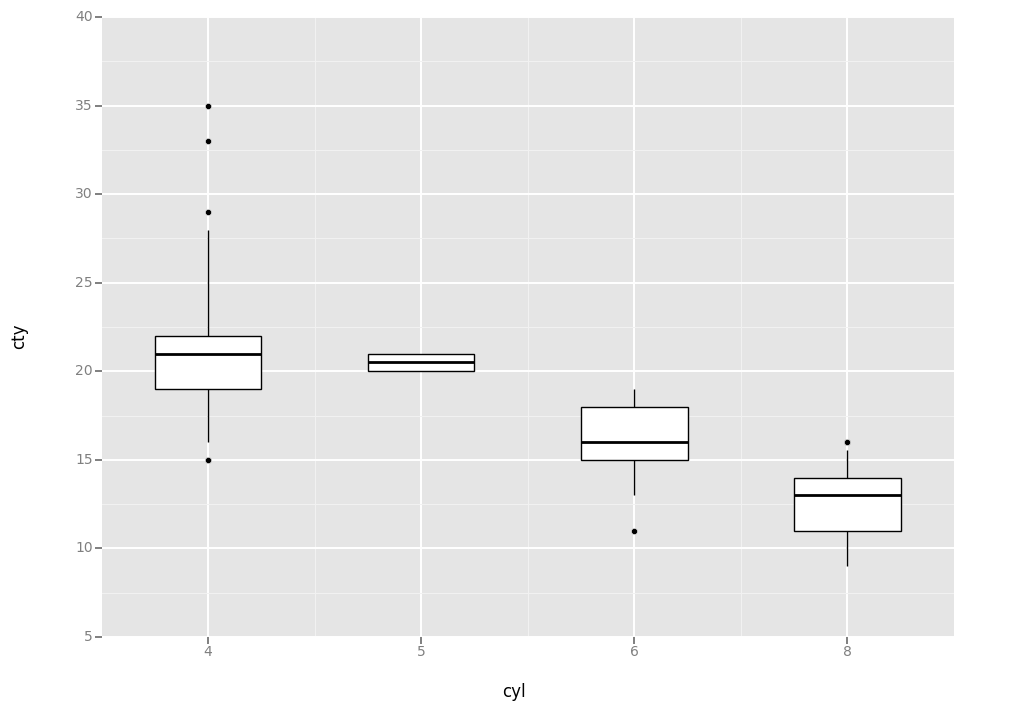

<ggplot: (300689717)>

In [20]:
# Single variable analysis: Box Plot
ggplot(mpg, aes(x='cyl', y='cty')) + geom_boxplot()

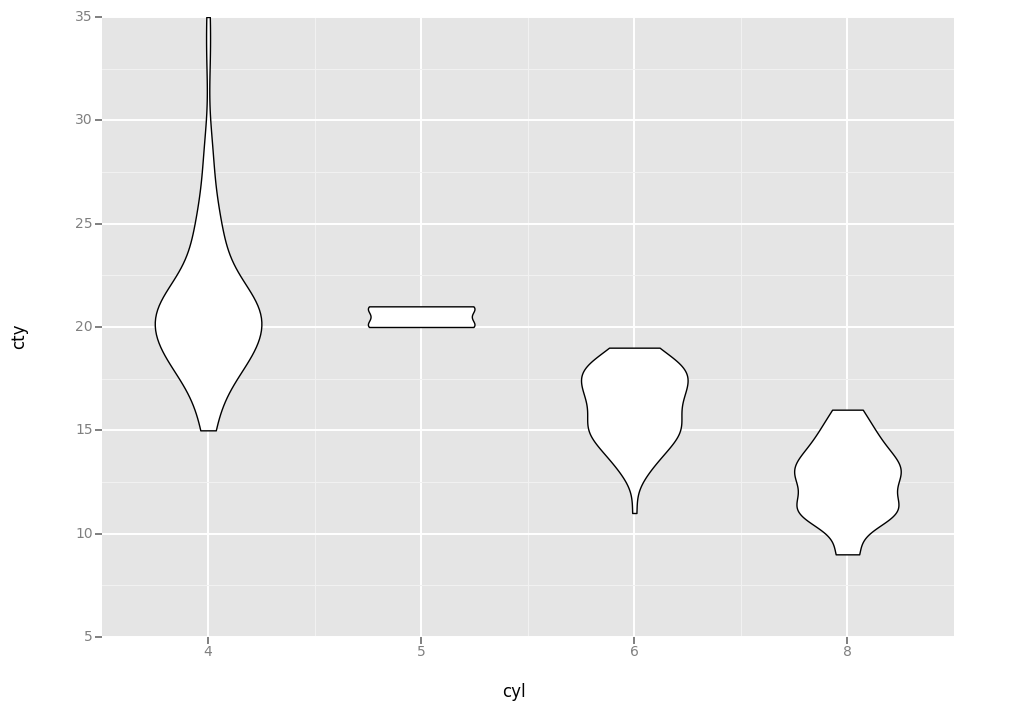

<ggplot: (301063889)>

In [21]:
# Single variable analysis: Violin Plot - applies the kernel density transformation per category
ggplot(mpg, aes(x='cyl', y='cty')) + geom_violin()

#### Two Variables: establishing a relationship

In [22]:
# data set diamonds - included in ggplot package
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


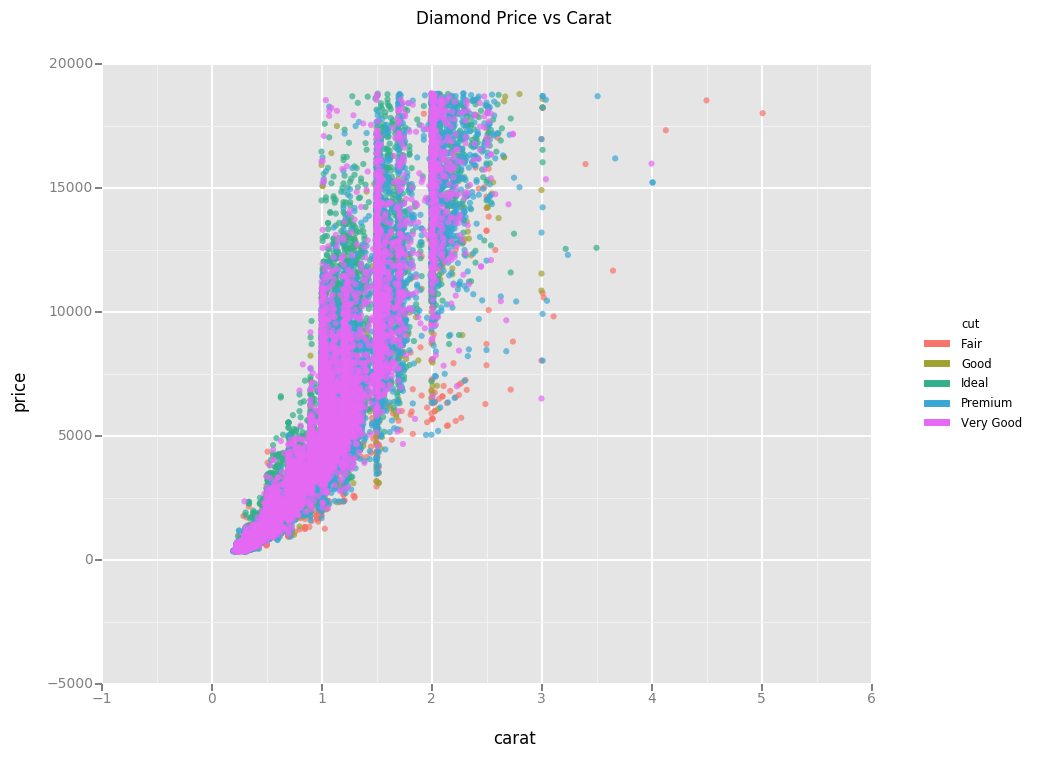

<ggplot: (300689841)>

In [23]:
# scatter plot
# backslash indicates the statement continues on the next line. Make sure no characters follow the slash on that line. 
ggplot(diamonds, aes('carat','price', colour='cut')) + \
    geom_point(alpha=0.7) + \
    ggtitle('Diamond Price vs Carat')

### 3. Plotly
A nice open source library for interactive visualisations

In [ ]:
# To run any command at the system shell, simply prefix it with !
# pip won't work from inside python without it
!pip install plotly --upgrade

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

print __version__ # requires version >= 1.9.0

In [ ]:
init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

In [ ]:
from plotly.graph_objs import *
import numpy as np

In [ ]:
# Scatter plot with heatmap
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [ ]:

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

iplot(fig)